In [1]:
# Import Required Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt



In [2]:
## Load and Preprocess the Data
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



In [4]:
# Reshape the data to fit the model input
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)









# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)








In [5]:

# Build and Compile the Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])








C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])






In [7]:
# Train the Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))






Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8544 - loss: 0.4615 - val_accuracy: 0.9803 - val_loss: 0.0611
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9829 - loss: 0.0564 - val_accuracy: 0.9894 - val_loss: 0.0378
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9881 - val_loss: 0.0369
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9908 - loss: 0.0272 - val_accuracy: 0.9884 - val_loss: 0.0369
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9938 - loss: 0.0218 - val_accuracy: 0.9904 - val_loss: 0.0325


In [8]:
#Save the Model (Optional)
model.save('mnist_digit_model.h5')




In [10]:
# Function to Load and Preprocess User Input Image


def load_and_preprocess_image(filepath):
    # Load the image in grayscale
    img = image.load_img(filepath, color_mode="grayscale", target_size=(28, 28))
    img = image.img_to_array(img)
    
    # Normalize the image
    img = img.astype('float32') / 255
    
    # Invert the image (MNIST uses white digits on a black background)
    img = 1 - img
    
    # Expand dimensions to fit the model input
    img = np.expand_dims(img, axis=0)
    
    return img



In [11]:
def predict_digit(model):
    # Take user input for the image path
    image_path = r"C:\Users\HP\Downloads\digit0.jpg"
    
    # Preprocess the image
    input_image = load_and_preprocess_image(image_path)
    
    # Predict the digit
    prediction = model.predict(input_image)
    predicted_digit = np.argmax(prediction)
    
    print(f'Predicted digit: {predicted_digit}')
    
    # Display the input image
    img = image.load_img(image_path, color_mode="grayscale")
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted digit: 0


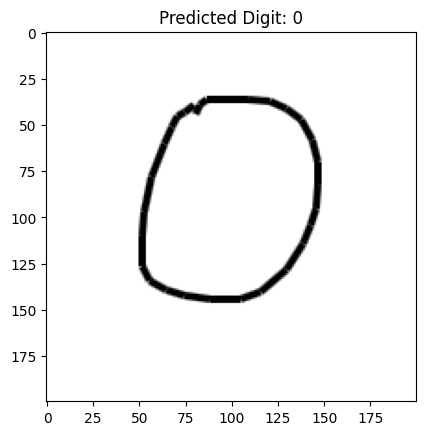

In [12]:
predict_digit(model)
